<a href="https://colab.research.google.com/github/kristina-skoptsova/diplom/blob/main/%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = '/content/medical_students_dataset.csv'
df = pd.read_csv(file)
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [4]:
def dataset_diagnosis(df, missing_threshold=0.5, top_unique=5):
    print(f"Общая информация: {len(df)} строк, {len(df.columns)} колонок")

    # Пропущенные значения
    missing = df.isnull().sum()
    print(f'Пропущенные значения: {missing}')

    # Дубликаты
    duplicates = df.duplicated().sum()
    print(f"Полных дубликатов: {duplicates} ({duplicates/len(df):.1%})")

    # Статистика для числовых колонок
    numeric_cols = df.select_dtypes(include='number').columns
    if not numeric_cols.empty:
        print("\nБазовая статистика для числовых колонок:")
        print(df[numeric_cols].describe().round(2))

dataset_diagnosis(df)

Общая информация: 200000 строк, 13 колонок
Пропущенные значения: Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64
Полных дубликатов: 7644 (3.8%)

Базовая статистика для числовых колонок:
       Student ID        Age     Height     Weight        BMI  Temperature  \
count   180000.00  180000.00  180000.00  180000.00  180000.00    180000.00   
mean     49974.04      26.02     174.95      69.97      23.34        98.60   
std      28879.64       4.89      14.45      17.32       7.03         0.50   
min          1.00      18.00     150.00      40.00      10.07        96.40   
25%      24971.75      22.00     162.48      54.97      17.86        98.26   
50%      49943.50      26.00     174.90      69.98      22.67        

In [5]:
# Удаление дубликатов
df = df.drop_duplicates()

# Замена пропущенных значений
cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in cols:
    df.loc[:, col] = df[col].fillna(df[col].mean())

In [6]:
# Создание колонки направление
df['Height'] = df['Height'].round()
df['Направление'] = pd.Categorical(df['Height']).codes + 1
df['Направление'].value_counts()

,count
Направление,
26,23494
2,3600
45,3594
46,3568
20,3566
28,3560
16,3549
3,3548
38,3536


In [7]:
data = pd.DataFrame({
    'Уникальный код, присвоенный поступающему': df['Student ID'],
    'Направление': df['Направление'],
    'Сумма баллов': df['Cholesterol'],
    'Сумма баллов за ВИ': df['Weight'],
    'Кол-во баллов за ИД': df['Heart Rate'],
    'Преимущественное право': df['Diabetes'],
    'Наличие договора': df['Smoking'],
    'Возраст': df['Age'],
    'Пол': df['Gender'],
    'Регион рождения': df['Weight'],
    'Уровень безработицы': df['BMI']

})
data

,"Уникальный код, присвоенный поступающему",Направление,Сумма баллов,Сумма баллов за ВИ,Кол-во баллов за ИД,Преимущественное право,Наличие договора,Возраст,Пол,Регион рождения,Уровень безработицы
0,1.000000,13,203.0,72.354947,95.0,No,NaN,18.000000,Female,72.354947,27.645835
1,2.000000,3,163.0,47.630941,93.0,No,No,26.022254,Male,47.630941,23.338982
2,3.000000,34,216.0,55.741083,76.0,Yes,No,32.000000,Female,55.741083,16.729017
3,49981.974488,33,141.0,63.332207,99.0,No,Yes,30.000000,Male,63.332207,19.096042
4,5.000000,26,231.0,46.234173,95.0,No,No,23.000000,Female,46.234173,23.338982
...,...,...,...,...,...,...,...,...,...,...,...
199995,49981.974488,28,130.0,95.756997,65.0,No,No,24.000000,Male,95.756997,30.737254
199996,99997.000000,15,198.0,45.225194,62.0,No,Yes,29.000000,Female,45.225194,16.831734
199997,99998.000000,26,154.0,99.648914,60.0,NaN,No,34.000000,Female,99.648914,33.189303
199998,99999.000000,7,225.0,50.142824,61.0,No,No,30.000000,Female,50.142824,20.486823


In [8]:
# Балансировка колонки направление
grouped = data.groupby('Направление')
desired_samples = 3600 # Макс кол-во студентов для направления

data = pd.DataFrame()
for direction, group in grouped:
    if direction == 26:  # Доминирующее направление
        # Уменьшение доминирующего направления
        sampled_group = group.sample(n=desired_samples, random_state=42)
    else:
        # Берутся все записи для редких классов или до желаемого количества
        sampled_group = group.sample(n=min(len(group), desired_samples), random_state=42, replace=False)

    data = pd.concat([data, sampled_group])

# Проверка результата
data['Направление'].value_counts()

,count
Направление,
26,3600
2,3600
45,3594
46,3568
20,3566
28,3560
16,3549
3,3548
38,3536


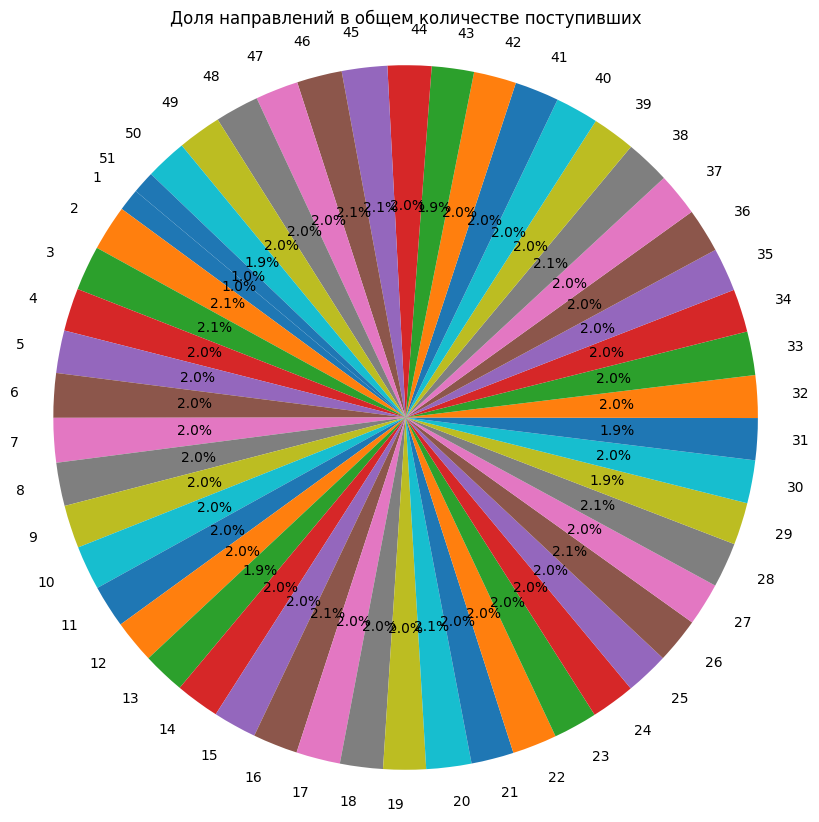

In [ ]:
grouped_data = data.groupby('Направление').size().reset_index(name='Количество поступивших')
# Визуализация доли направлений
plt.figure(figsize=(10, 10))
plt.pie(grouped_data['Количество поступивших'], labels=grouped_data['Направление'], autopct='%1.1f%%', startangle=140)
plt.title('Доля направлений в общем количестве поступивших')
plt.axis('equal')
plt.show()

In [9]:
# Создание колонки Год
# Подсчет количества записей по направлениям
counts = data['Направление'].value_counts().reset_index()
counts.columns = ['Направление', 'Количество поступивших']

# Параметры временного ряда
start_year = 1908
end_year = 2024
years = list(range(start_year, end_year + 1))
num_years = len(years)

# Классификация направлений по группам роста
directions = counts['Направление'].tolist()
growth_rates = {}

for i, direction in enumerate(directions):
    if i < 15:
        growth_rates[direction] = 1.02  # Первые 15 направлений (+2%)
    elif 15 <= i < 30:
        growth_rates[direction] = 1.01  # Следующие 15 направлений (+1%)
    else:
        growth_rates[direction] = 1.005  # Остальные (+0,5%)

# Распределение записей по годам с учетом прироста
yearly_distribution = {}

for direction in directions:
    # Общее количество записей для направления
    total_records = counts.loc[
        counts['Направление'] == direction,
        'Количество поступивших'
    ].values[0]

    # Рассчет распределения по годам
    distribution = []
    rate = growth_rates[direction]

    for year_idx in range(num_years):
        # Вес для текущего года с учетом прироста
        weight = rate ** year_idx
        distribution.append(weight)

    # Нормализация веса, чтобы их сумма была равна 1
    distribution = np.array(distribution) / np.sum(distribution)

    # Рассчет количества записей для каждого года
    yearly_counts = (total_records * distribution).round().astype(int)

    # Корректировка общего количества записей (из-за округления)
    while yearly_counts.sum() != total_records:
        diff = total_records - yearly_counts.sum()
        yearly_counts[np.argmax(yearly_counts)] += diff

    yearly_distribution[direction] = yearly_counts

# Добавление год поступления в исходный DataFrame
data['Год поступления'] = 0

# Распределение записей по годам
for direction in directions:
    # Фильтрация записей для текущего направления
    mask = data['Направление'] == direction
    direction_data = data[mask].copy()

    # Распределение по годам
    counts = yearly_distribution[direction]

    # Создание списка годов для каждой записи
    years_list = []
    for year, count in zip(years, counts):
        years_list.extend([year] * count)

    # Присваивание
    data.loc[mask, 'Год поступления'] = years_list[:sum(mask)]

# Проверка результата
data[['Направление', 'Год поступления']]

,Направление,Год поступления
130295,1,1908
128773,1,1908
84782,1,1908
184664,1,1908
125291,1,1908
...,...,...
127927,51,2024
146222,51,2024
94884,51,2024
164550,51,2024


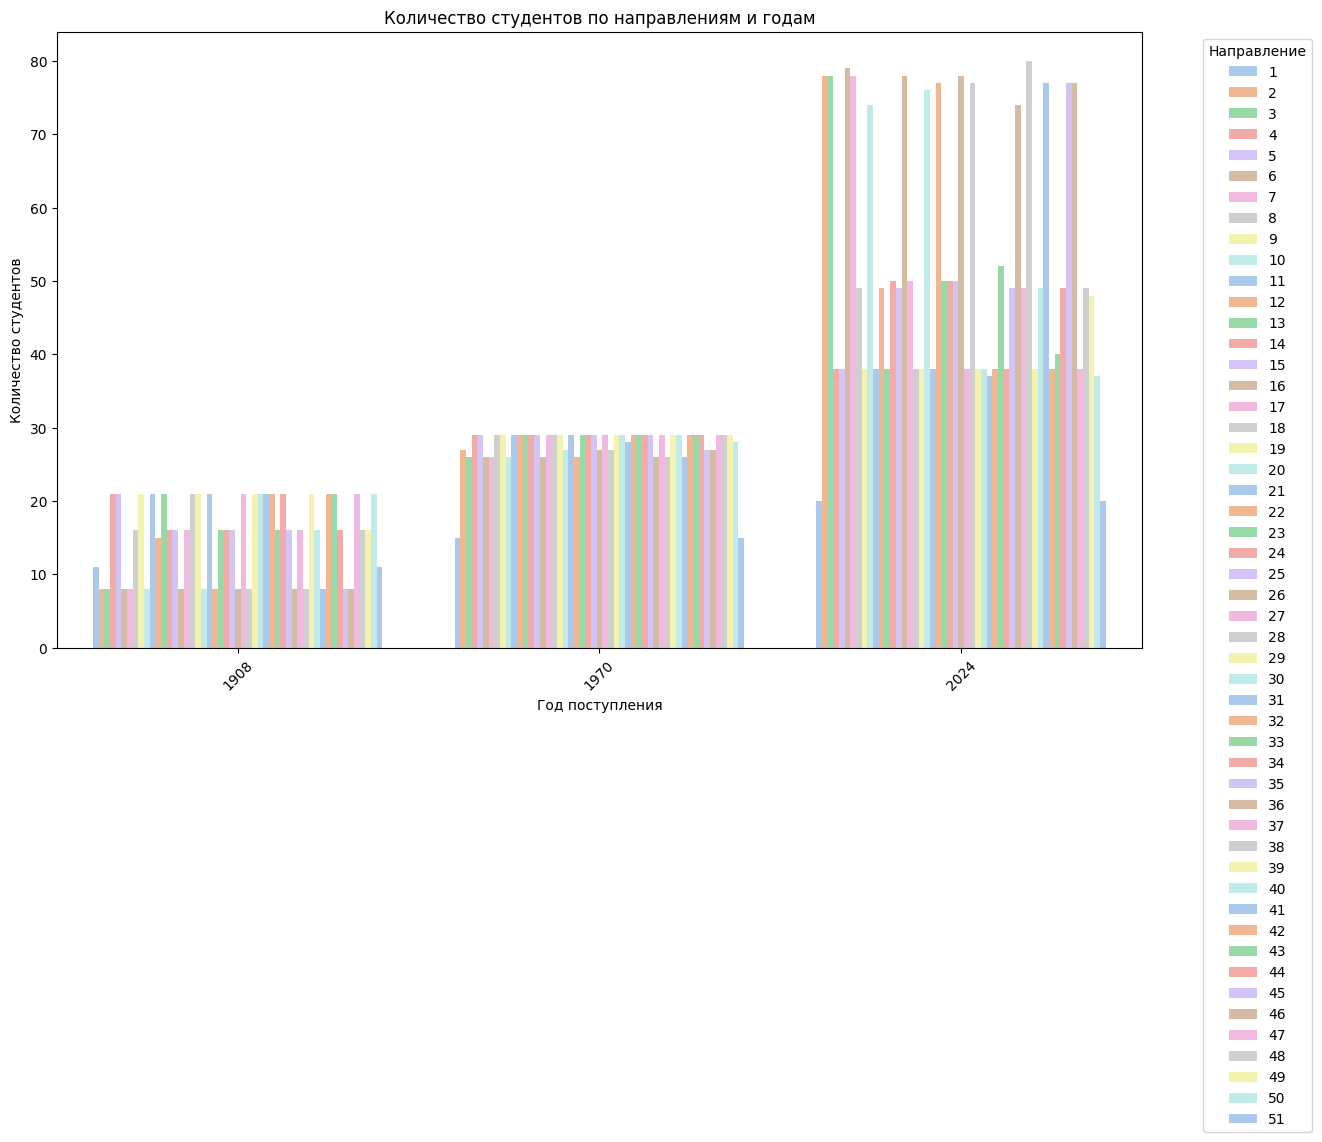

In [ ]:
count_df = data.groupby(['Год поступления', 'Направление']).size().reset_index(name='Количество')
# Фильтрация для нужных годов
years = [1908, 1970, 2024]
count_df_filtered = count_df[count_df['Год поступления'].isin(years)]

# Визуализация результатов
plt.figure(figsize=(14, 8))
sns.barplot(x='Год поступления', y='Количество', hue='Направление', data=count_df_filtered, palette='pastel')
plt.title('Количество студентов по направлениям и годам')
plt.xlabel('Год поступления')
plt.ylabel('Количество студентов')
plt.legend(title='Направление', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Поворот меток на оси X
plt.show()

In [10]:
data

,"Уникальный код, присвоенный поступающему",Направление,Сумма баллов,Сумма баллов за ВИ,Кол-во баллов за ИД,Преимущественное право,Наличие договора,Возраст,Пол,Регион рождения,Уровень безработицы,Год поступления
130295,30296.0,1,223.0,97.910800,64.0,No,No,18.0,NaN,97.910800,43.400523,1908
128773,28774.0,1,160.0,63.742926,89.0,NaN,No,27.0,Female,63.742926,28.326713,1908
84782,84783.0,1,219.0,93.133557,98.0,No,No,18.0,Male,93.133557,41.290430,1908
184664,84665.0,1,161.0,71.457447,95.0,NaN,No,30.0,Male,71.457447,31.645957,1908
125291,25292.0,1,206.0,60.702052,95.0,No,No,33.0,Female,60.702052,26.885288,1908
...,...,...,...,...,...,...,...,...,...,...,...,...
127927,27928.0,51,242.0,82.055842,68.0,No,No,24.0,Female,82.055842,23.338982,2024
146222,46223.0,51,141.0,64.785847,68.0,No,No,23.0,NaN,64.785847,16.259916,2024
94884,94885.0,51,157.0,71.577233,75.0,No,No,32.0,Female,71.577233,17.980415,2024
164550,64551.0,51,246.0,54.152584,81.0,No,No,26.0,Female,54.152584,13.584797,2024


In [11]:
from sklearn.preprocessing import OrdinalEncoder
# Кодидирование типа объект
encoder = OrdinalEncoder()
data[['Преимущественное право', 'Наличие договора', 'Пол']] = encoder.fit_transform(data[['Преимущественное право', 'Наличие договора', 'Пол']])
# Замена NaN
data['Преимущественное право'] = data['Преимущественное право'].fillna(data['Преимущественное право'].mode()[0])
data['Наличие договора'] = data['Наличие договора'].fillna(data['Наличие договора'].mode()[0])
data['Пол'] = data['Пол'].fillna(data['Пол'].mode()[0])
# Проверка на NaN
nan_check = data.isna().sum()
nan_check

,0
"Уникальный код, присвоенный поступающему",0
Направление,0
Сумма баллов,0
Сумма баллов за ВИ,0
Кол-во баллов за ИД,0
Преимущественное право,0
Наличие договора,0
Возраст,0
Пол,0
Регион рождения,0


In [12]:
# Округление значений
columns_to_round = ['Сумма баллов', 'Сумма баллов за ВИ', 'Кол-во баллов за ИД','Регион рождения', 'Уровень безработицы']
data[columns_to_round] = data[columns_to_round].round()

In [13]:
dataset_diagnosis(data)

Общая информация: 172462 строк, 12 колонок
Пропущенные значения: Уникальный код, присвоенный поступающему    0
Направление                                 0
Сумма баллов                                0
Сумма баллов за ВИ                          0
Кол-во баллов за ИД                         0
Преимущественное право                      0
Наличие договора                            0
Возраст                                     0
Пол                                         0
Регион рождения                             0
Уровень безработицы                         0
Год поступления                             0
dtype: int64
Полных дубликатов: 158 (0.1%)

Базовая статистика для числовых колонок:
       Уникальный код, присвоенный поступающему  Направление  Сумма баллов  \
count                                 172462.00    172462.00     172462.00   
mean                                   49935.15        25.96        184.45   
std                                    27327.92        14.46    

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
# Создание нового датафрейма после группировки
df_aggregated = data.groupby(['Направление', 'Год поступления']).size().reset_index(name='Количество поступивших')

# Добавление необходимых статистик
agg_funcs = {
    'Сумма баллов': 'mean',
    'Сумма баллов за ВИ': 'mean',
    'Кол-во баллов за ИД': 'mean',
    'Преимущественное право': 'sum',
    'Наличие договора': 'sum',
    'Возраст': 'mean',
    'Пол': 'sum',
    'Регион рождения': 'mean',
    'Уровень безработицы': 'mean'
}

agg_df = data.groupby(['Год поступления', 'Направление']).agg(agg_funcs).reset_index()

# Расчет доли женщин
agg_df['Доля женщин'] = agg_df['Пол'] / df_aggregated['Количество поступивших']
# Расчет доли по праву
agg_df['Доля преимущественного права'] = agg_df['Преимущественное право'] / df_aggregated['Количество поступивших']
# Расчет доли договора
agg_df['Доля наличия договора'] = agg_df['Наличие договора'] / df_aggregated['Количество поступивших']

# Объединение данных
final_df = pd.merge(
    df_aggregated,
    agg_df.drop(columns=['Пол', 'Преимущественное право', 'Наличие договора']),
    on=['Год поступления', 'Направление']
)

final_df

,Направление,Год поступления,Количество поступивших,Сумма баллов,Сумма баллов за ВИ,Кол-во баллов за ИД,Возраст,Регион рождения,Уровень безработицы,Доля женщин,Доля преимущественного права,Доля наличия договора
0,1,1908,11,180.909091,76.090909,83.454545,25.636364,76.090909,33.727273,0.454545,0.181818,0.000000
1,1,1909,11,181.636364,69.272727,82.727273,24.545455,69.272727,29.909091,0.214286,0.000000,0.214286
2,1,1910,11,173.636364,63.181818,83.181818,23.820205,63.181818,27.000000,0.210526,0.105263,0.052632
3,1,1911,11,184.181818,72.454545,82.909091,26.913137,72.454545,32.636364,0.312500,0.125000,0.000000
4,1,1912,11,193.454545,69.545455,82.363636,26.636364,69.545455,29.909091,0.113636,0.045455,0.068182
...,...,...,...,...,...,...,...,...,...,...,...,...
5962,51,2020,19,183.210526,61.842105,80.105263,26.899422,61.842105,17.052632,0.333333,0.041667,0.291667
5963,51,2021,20,192.150000,70.600000,75.750000,26.301113,70.600000,17.850000,0.225806,0.032258,0.096774
5964,51,2022,20,181.950000,62.550000,77.050000,26.702225,62.550000,16.200000,0.916667,0.083333,0.166667
5965,51,2023,20,179.050000,69.900000,80.500000,24.903338,69.900000,18.800000,0.666667,0.000000,0.333333


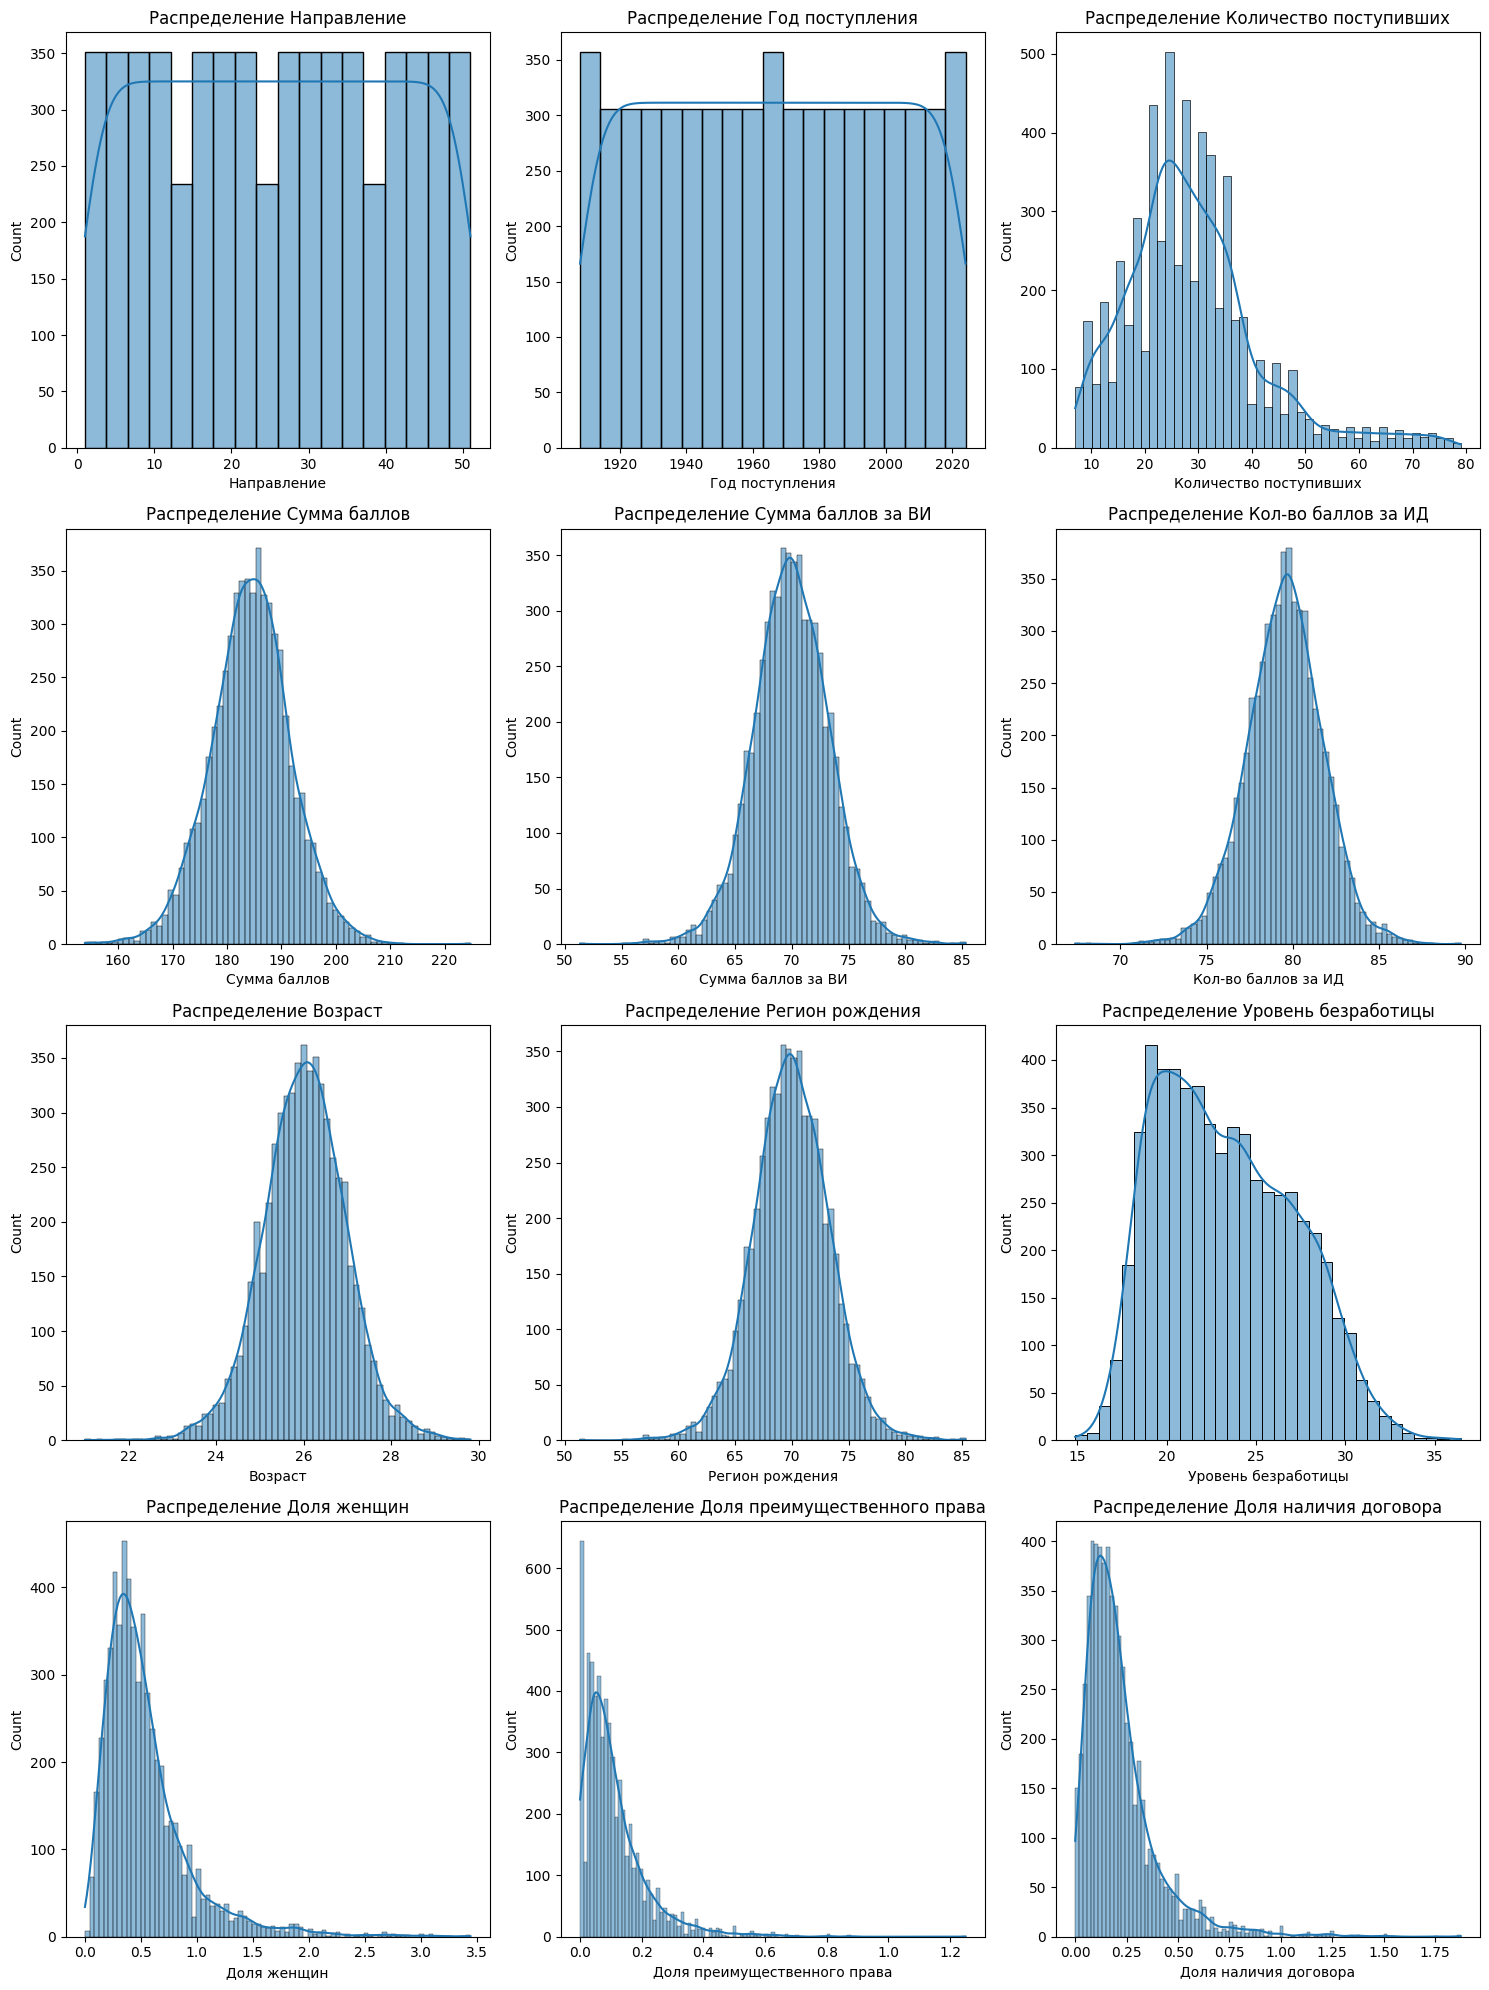

In [ ]:
# Определение числовых колонок
numeric_columns = final_df.select_dtypes(include=[np.number]).columns.tolist()

# Определение количества строк и столбцов для подграфиков
num_plots = len(numeric_columns)
num_cols = 3
num_rows = (num_plots // num_cols) + 1 if num_plots % num_cols != 0 else num_plots // num_cols

# Построение графиков
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(final_df[column], kde=True)
    plt.title(f'Распределение {column}')
plt.tight_layout()
plt.show()

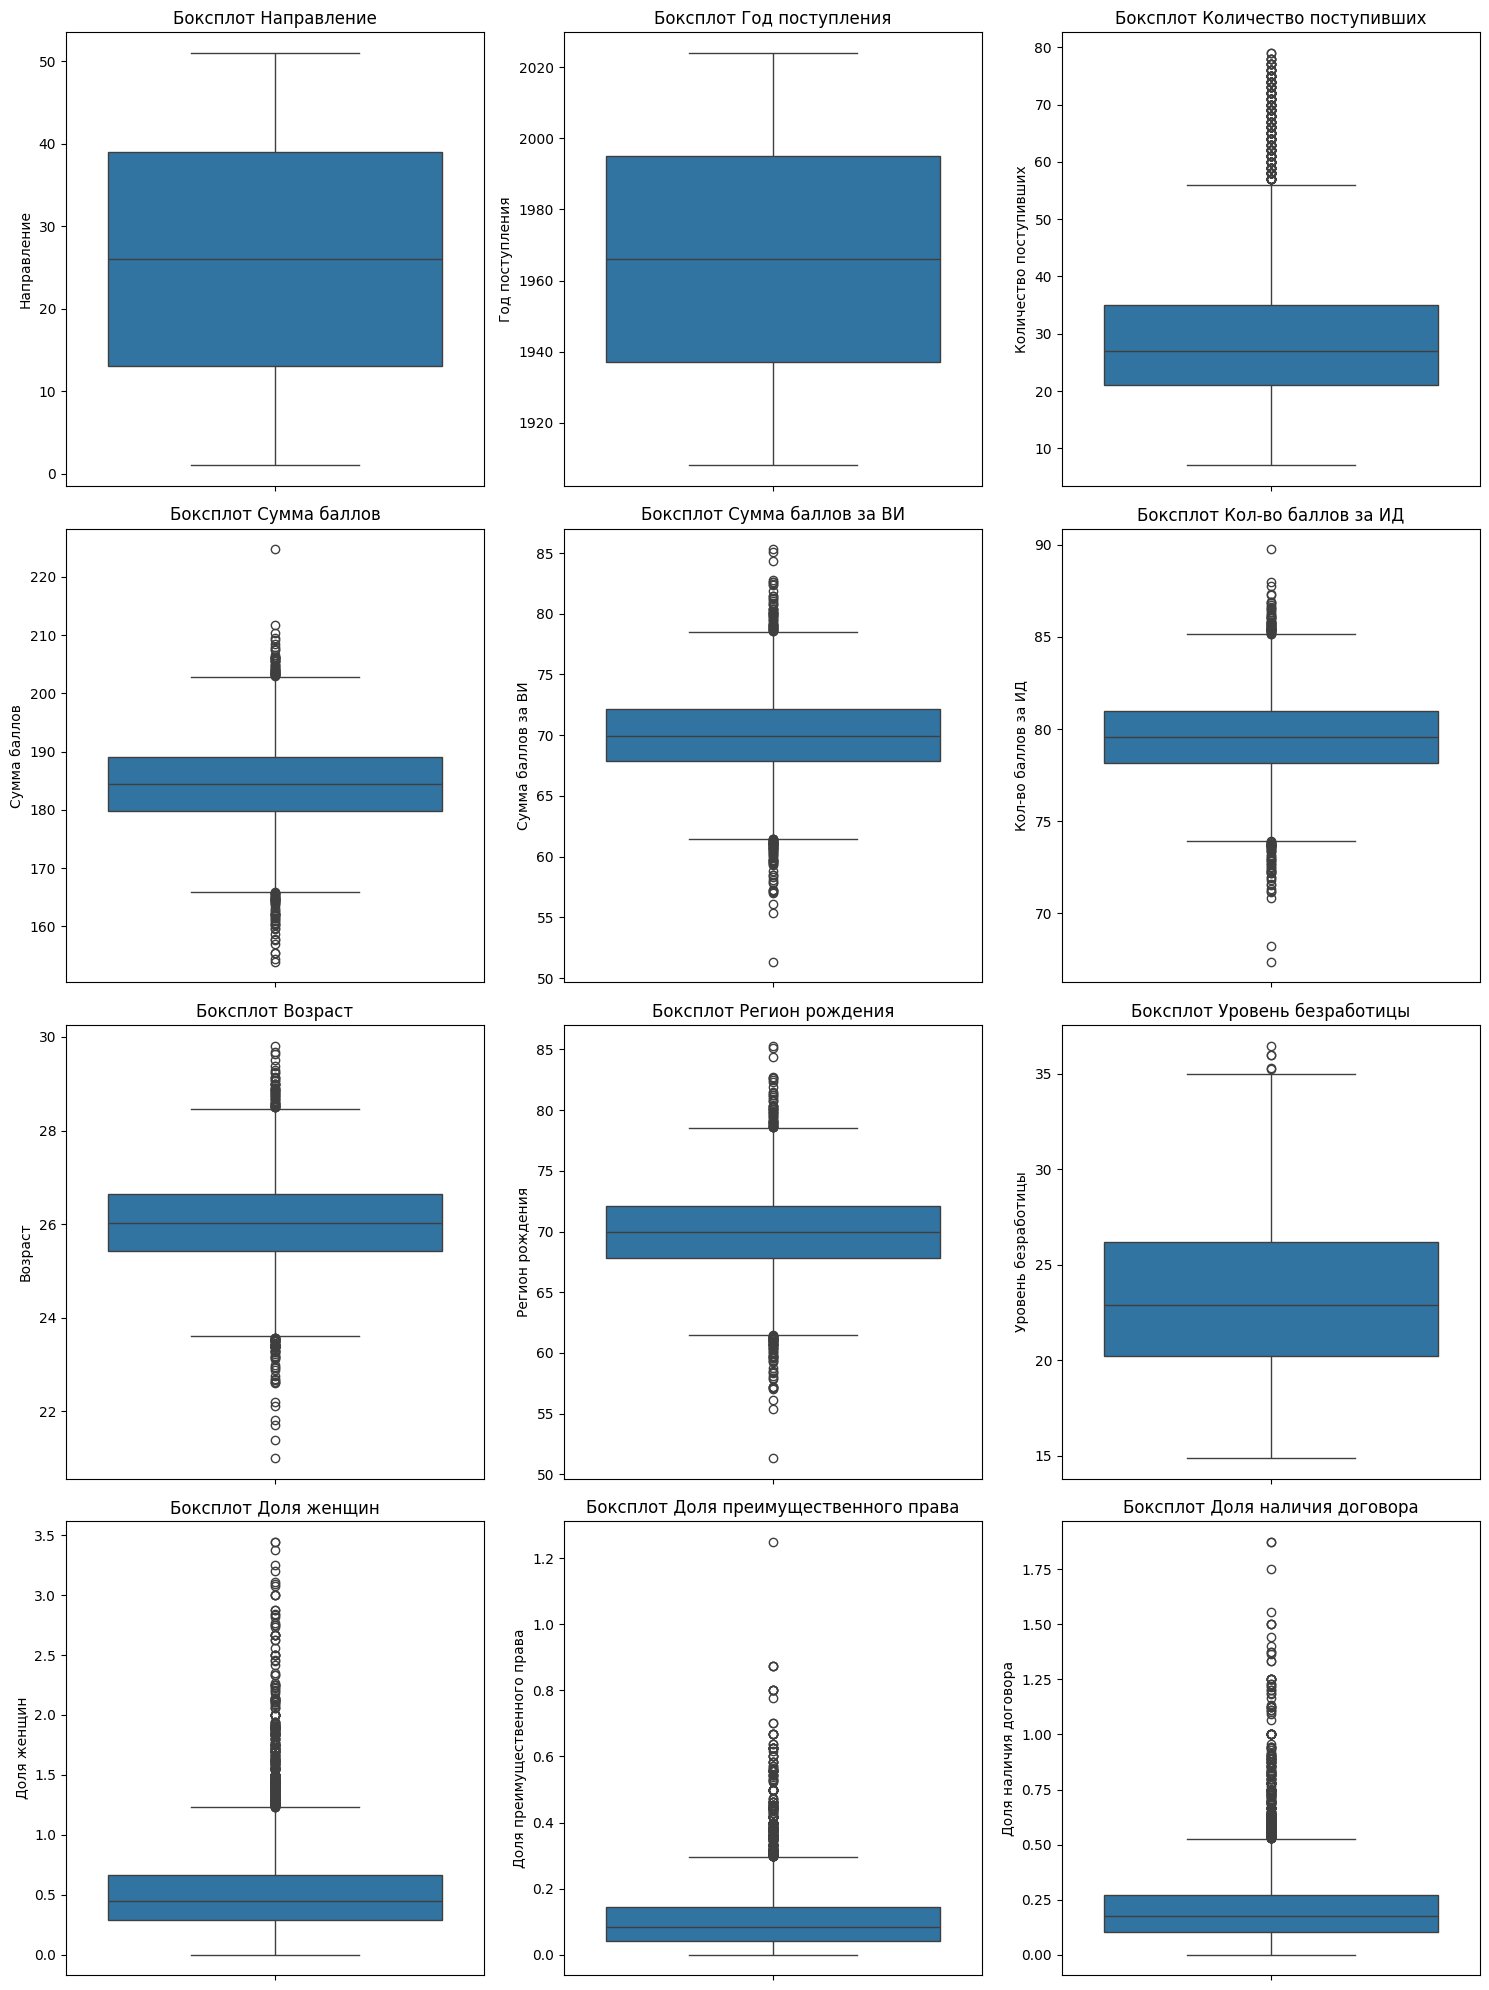

In [ ]:
# Боксплоты для выявления выбросов
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=final_df[column])
    plt.title(f'Боксплот {column}')
plt.tight_layout()
plt.show()

In [16]:
output_file_path = 'dataset_muiv.csv'
final_df.to_csv(output_file_path, index=False, encoding='utf-8-sig')

In [ ]:
from sklearn.preprocessing import RobustScaler

# Колонки, которые не нужно масштабировать
exclude_columns = ['Направление', 'Год поступления']

# Колонки для масштабирования
columns_to_scale = [col for col in final_df.columns if col not in exclude_columns]

# Применение RobustScaler
scaler = RobustScaler()
final_df[columns_to_scale] = scaler.fit_transform(final_df[columns_to_scale])

In [ ]:
final_df

,Направление,Год поступления,Количество поступивших,Сумма баллов,Сумма баллов за ВИ,Кол-во баллов за ИД,Возраст,Регион рождения,Уровень безработицы,Доля женщин,Доля преимущественного права,Доля наличия договора
0,1,1908,-1.142857,2.038799,0.738866,-1.079670,-0.625137,0.738866,1.550576,0.026779,0.073653,-0.486295
1,1,1909,-1.142857,-0.425159,0.675049,0.406559,0.498504,0.675049,1.535407,-0.231451,-0.810185,1.073488
2,1,1910,-1.142857,0.605581,-1.026755,-1.790475,0.268133,-1.026755,0.837648,-0.341085,0.213207,-0.402199
3,1,1911,-1.142857,-0.326993,0.802684,1.085055,-1.148838,0.802684,1.429226,-0.846899,-0.202546,0.445770
4,1,1912,-1.142857,-2.368839,-3.026373,-1.338145,0.118978,-3.026373,0.397756,-0.997533,-0.589226,-0.885751
...,...,...,...,...,...,...,...,...,...,...,...,...
5962,51,2020,-0.571429,0.766262,0.692962,-0.244729,-1.280371,0.692962,-0.719137,-0.184109,1.215278,-0.042454
5963,51,2021,-0.500000,-1.995810,2.367279,0.734499,0.300703,2.367279,-0.365228,-0.408602,-0.496565,-0.640923
5964,51,2022,-0.500000,0.201629,-0.042900,0.308016,0.874036,-0.042900,-0.890823,0.810078,-0.810185,1.422220
5965,51,2023,-0.500000,-0.608238,-1.084190,0.805579,-0.726563,-1.084190,-1.040992,0.058915,-0.162037,0.152836


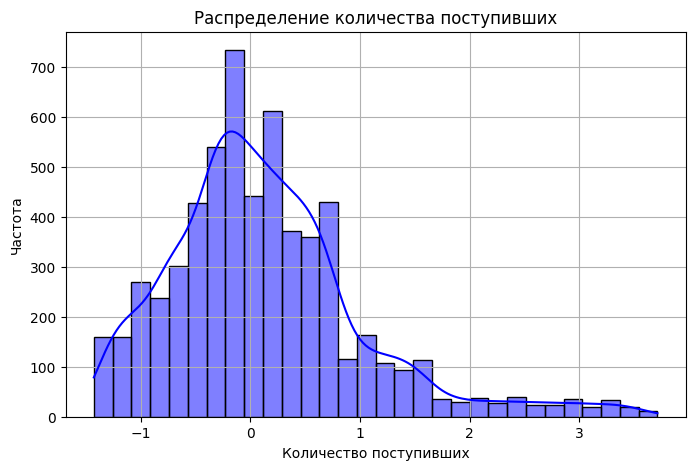

Статистика целевой переменной:
count    5967.000000
mean        0.134262
std         0.892401
min        -1.428571
25%        -0.428571
50%         0.000000
75%         0.571429
max         3.714286
Name: Количество поступивших, dtype: float64


In [ ]:
# Гистограмма целевой переменной
plt.figure(figsize=(8, 5))
sns.histplot(final_df['Количество поступивших'], bins=30, kde=True, color='blue')
plt.title('Распределение количества поступивших')
plt.xlabel('Количество поступивших')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Описание распределения
print("Статистика целевой переменной:")
print(final_df['Количество поступивших'].describe())

                               Направление  Год поступления  \
Направление                   1.000000e+00     2.316199e-14   
Год поступления               2.316199e-14     1.000000e+00   
Количество поступивших       -6.442496e-03     8.176354e-01   
Сумма баллов                  1.174573e-02    -2.368360e-04   
Сумма баллов за ВИ           -4.068284e-03     1.451766e-02   
Кол-во баллов за ИД           3.362915e-02     2.385982e-02   
Возраст                       5.559060e-03    -9.370971e-03   
Регион рождения              -4.068284e-03     1.451766e-02   
Уровень безработицы          -9.423635e-01     1.603528e-03   
Доля женщин                   4.810389e-04     4.812645e-01   
Доля преимущественного права -2.062772e-02     3.547909e-01   
Доля наличия договора         4.984934e-03     4.258952e-01   

                              Количество поступивших  Сумма баллов  \
Направление                                -0.006442      0.011746   
Год поступления                         

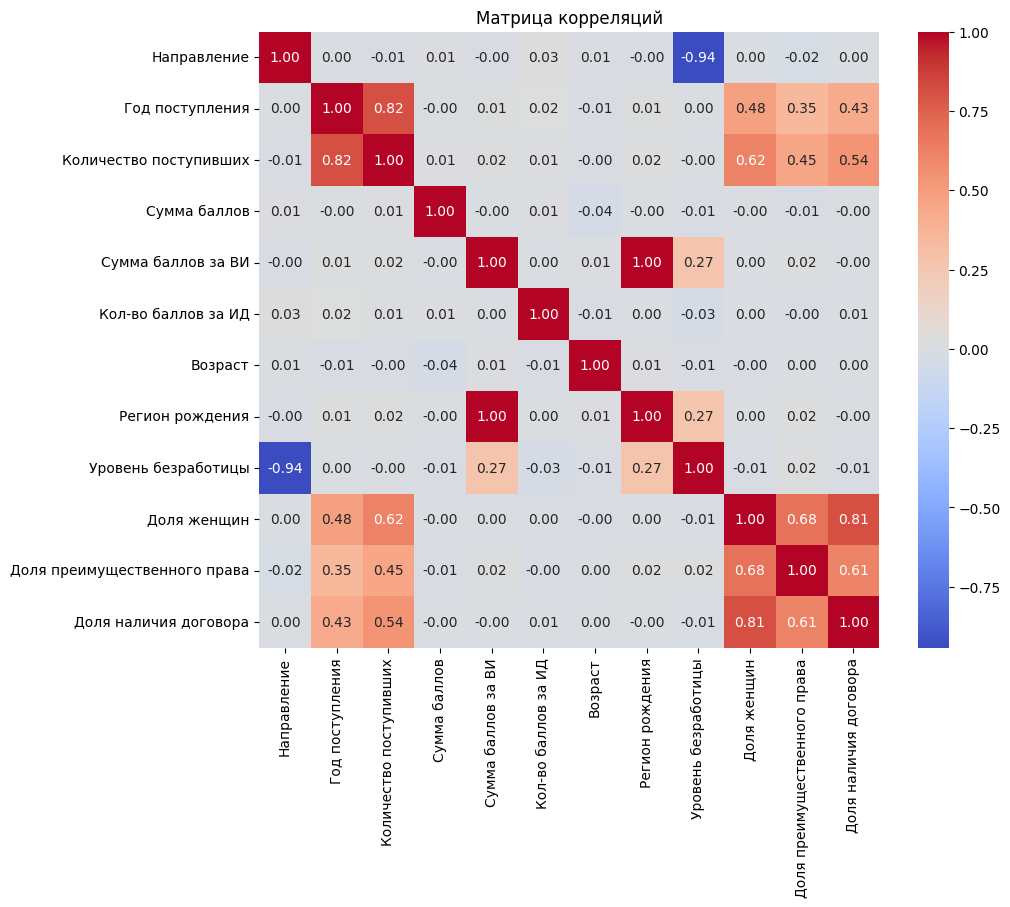

Корреляция с целевой переменной:
Количество поступивших          1.000000
Год поступления                 0.817635
Доля женщин                     0.616128
Доля наличия договора           0.540494
Доля преимущественного права    0.451673
Сумма баллов за ВИ              0.017795
Регион рождения                 0.017795
Кол-во баллов за ИД             0.012794
Сумма баллов                    0.009156
Уровень безработицы            -0.001270
Возраст                        -0.004954
Направление                    -0.006442
Name: Количество поступивших, dtype: float64


In [ ]:
# Расчет матрицы корреляции
correlation_matrix = final_df.corr()
print(correlation_matrix)

# Тепловая карта корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций')
plt.show()

# Корреляция с целевой переменной
target_corr = correlation_matrix['Количество поступивших'].sort_values(ascending=False)
print("Корреляция с целевой переменной:")
print(target_corr)

Удаление колонок из-за сильной корреляции.
Уровень безработицы
Регион рождения
Доля наличия договора


In [ ]:
columns_to_drop = ["Уровень безработицы", "Регион рождения", "Доля наличия договора"]
final_df = final_df.drop(columns=columns_to_drop)

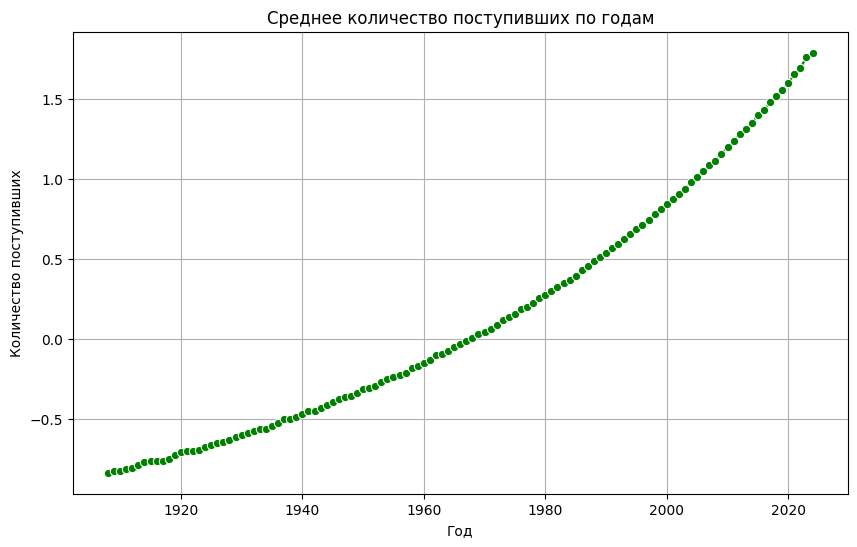

In [ ]:
# Группировка данных по годам
yearly_trends = final_df.groupby('Год поступления')['Количество поступивших'].mean().reset_index()

# Линейный график трендов
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_trends, x='Год поступления', y='Количество поступивших', marker='o', color='green')
plt.title('Среднее количество поступивших по годам')
plt.xlabel('Год')
plt.ylabel('Количество поступивших')
plt.grid(True)
plt.show()

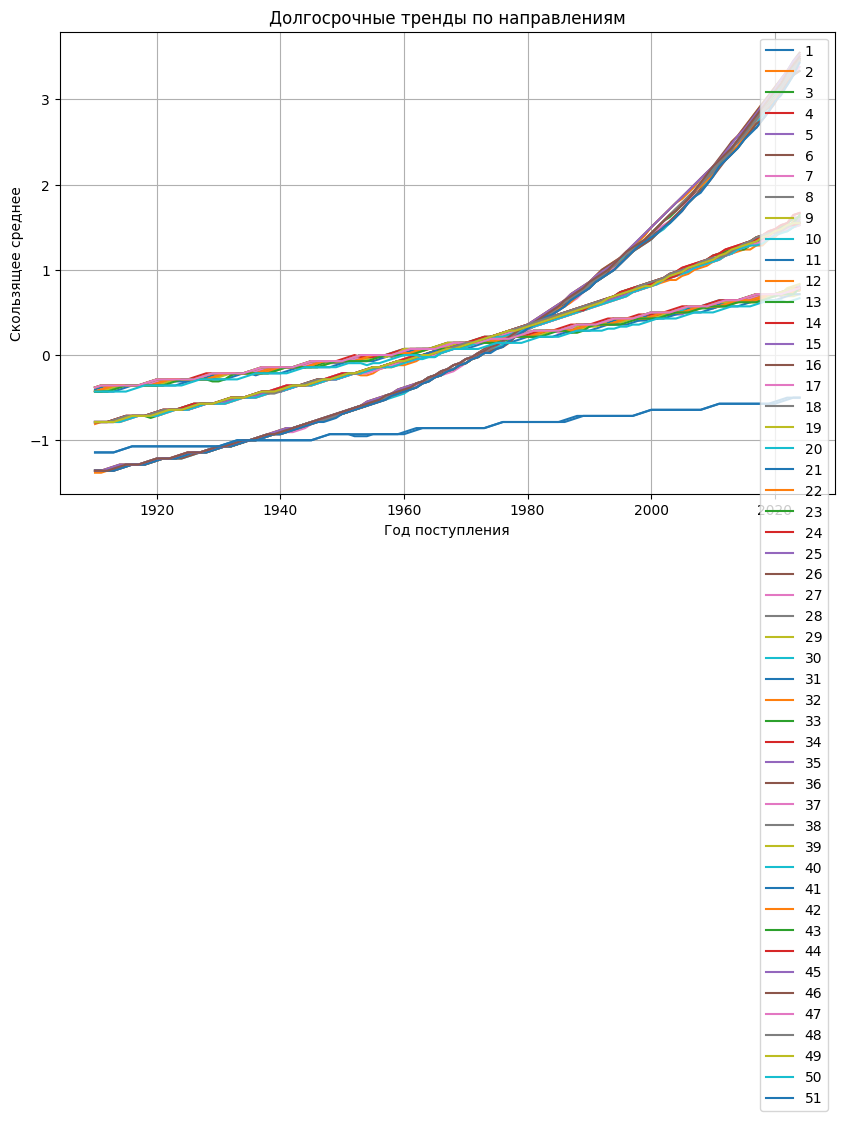

In [ ]:
# Скользящее среднее
final_df['Среднее'] = final_df.groupby('Направление')['Количество поступивших'].transform(lambda x: x.rolling(window=3).mean())

# Визуализация трендов
plt.figure(figsize=(10, 6))
for direction in final_df['Направление'].unique():
    subset = final_df[final_df['Направление'] == direction]
    plt.plot(subset['Год поступления'], subset['Среднее'], label=direction)

plt.title('Долгосрочные тренды по направлениям')
plt.xlabel('Год поступления')
plt.ylabel('Скользящее среднее')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Направление                   5967 non-null   int8   
 1   Год поступления               5967 non-null   int64  
 2   Количество поступивших        5967 non-null   float64
 3   Сумма баллов                  5967 non-null   float64
 4   Сумма баллов за ВИ            5967 non-null   float64
 5   Кол-во баллов за ИД           5967 non-null   float64
 6   Возраст                       5967 non-null   float64
 7   Доля женщин                   5967 non-null   float64
 8   Доля преимущественного права  5967 non-null   float64
 9   Среднее                       5865 non-null   float64
dtypes: float64(8), int64(1), int8(1)
memory usage: 425.5 KB
